In [1]:
# Imports.
import naclib.util
import skimage.registration  # Needs skimage>=0.17.2
import skimage.filters
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(1337)

def initial_location_array():
    locs = 0.95000000000000 * np.array([[0.0,   1.0],
                        [-0.5,  0.5],   [0.0,   0.5],   [0.5,   0.5],
        [-1.0,  0.0],   [-0.5,  0.0],   [0.0,   0.0],   [0.5,   0.0],   [1.0,   0.0],
                        [-0.5,  -0.5],  [0.0,  -0.5],   [0.5,   -0.5],
                                        [0.0,  -1.0]])
    return locs

def location_array_to_img(locs, n_px, sig):
    image = np.zeros((n_px, n_px))
    for loc in locs:
        im_loc = (int(n_px/2 + loc[0]*n_px/2), int(n_px/2 + loc[1]*n_px/2))
        image[im_loc[0], im_loc[1]] = 1
    return skimage.filters.gaussian(image, sig)
    
locs0 = initial_location_array()
locs0 = 0.7 * locs0 - 0.1 + 0.1 * np.random.uniform(size=locs0.shape)
locs1 = 0.96 * locs0 + 0.2 + 0.01 * np.random.uniform(size=locs0.shape)

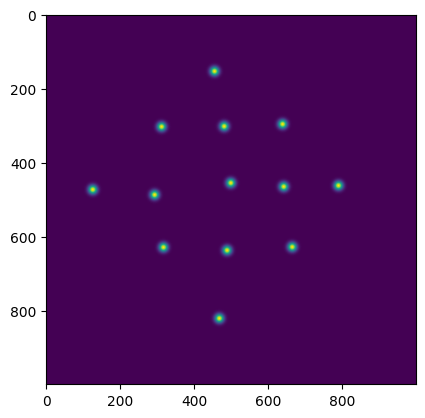

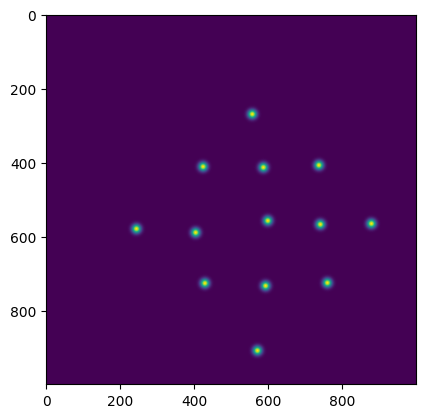

[-102.  -99.] -9.324139264543868e-17


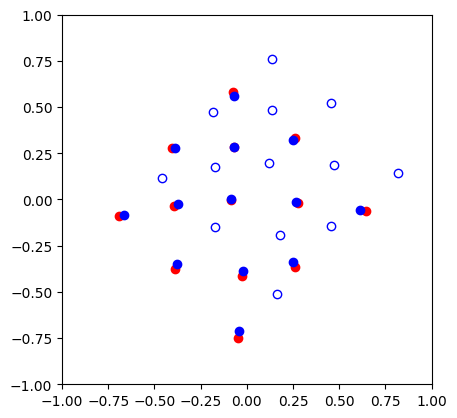

In [3]:
im_size = 1000
image0 = location_array_to_img(locs0, im_size, 8)
image1 = location_array_to_img(locs1, im_size, 8)

plt.imshow(image0)
plt.show()
plt.close()
plt.imshow(image1)
plt.show()
plt.close()
shifts, error, phasediff = skimage.registration.phase_cross_correlation(image0/np.amax(image0), image1/np.amax(image1))
print(shifts, phasediff)
locs1_corrected = np.zeros(locs1.shape)
locs1_corrected[:, 0] = locs1[:, 0] + 2 * shifts[0] / im_size
locs1_corrected[:, 1] = locs1[:, 1] + 2 * shifts[1] / im_size

plt.scatter(locs0[:, 0], locs0[:, 1], c='r')
plt.scatter(locs1[:, 0], locs1[:, 1], c='w', edgecolor='b')
plt.scatter(locs1[:, 0] + 2 * shifts[0] / im_size, locs1[:, 1] + 2 * shifts[1] / im_size, c='b')
plt.gca().set_aspect('equal')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
plt.close()

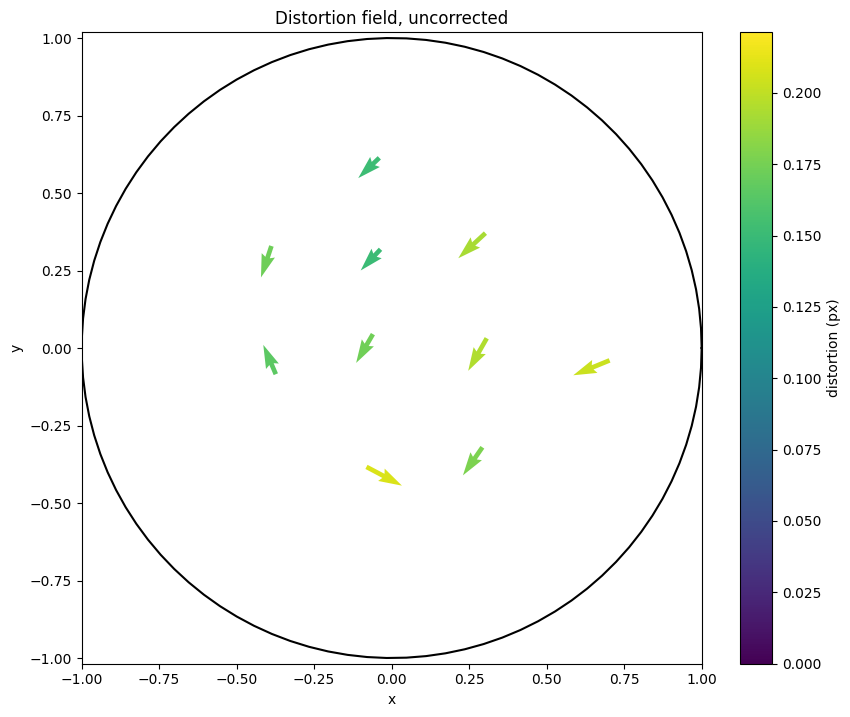

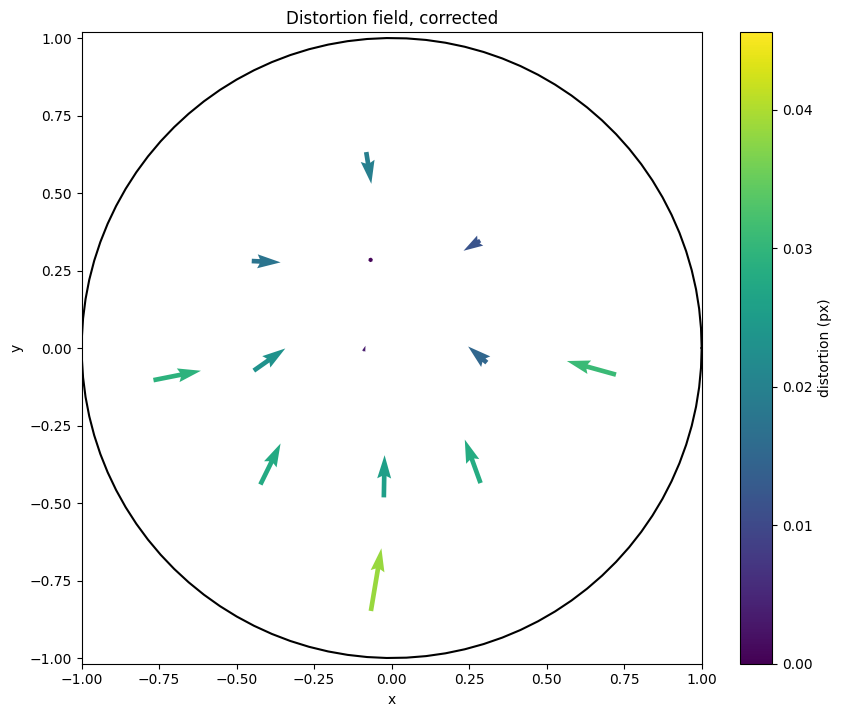

In [4]:
def make_pairs_and_get_distortion_grid(coords0, coords1, title, threshold=0.3):

    # Get pairs.
    mapping = naclib.util.find_neighbours(coords0, coords1, threshold=threshold)
    locs0_pairs, locs1_pairs = naclib.util.make_pairs(coords0, coords1, mapping)

    # Get distortion grid.
    D = np.zeros(locs0_pairs.shape)
    D[:, 0] = locs1_pairs[:, 0] - locs0_pairs[:, 0]
    D[:, 1] = locs1_pairs[:, 1] - locs0_pairs[:, 1]

    # Plot distortion grid.
    magnitude = np.hypot(D[:, 0], D[:, 1])
    plt.figure(figsize=(10, 8.2))
    q = plt.quiver(locs0_pairs[:, 0], locs0_pairs[:, 1], D[:, 0], D[:, 1], magnitude, pivot='mid', clim=(0, 1.2 * np.amax(D)))
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta), c='k')
    clb = plt.colorbar(q)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    clb.set_label('distortion (px)')
    plt.axis('equal')
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.show()
    
make_pairs_and_get_distortion_grid(locs0, locs1, 'Distortion field, uncorrected')
make_pairs_and_get_distortion_grid(locs0, locs1_corrected, 'Distortion field, corrected')